#Classification of Music Genres by Album Cover Images#

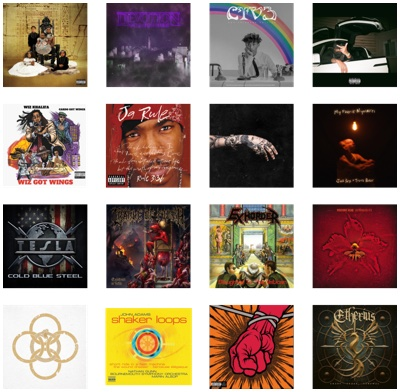

**Student/Contributor: Alexander Zollondz**

Album covers in music genres reflects a special aesthetic and often the cultural styles the performers create with their music. Although humans can classify the music artwork very well into genres, in terms of computer vision the question is if machines can do it the same way. Therefore i want to know if it is possible to develop a neural network that can derive information from cover artwork to predict the categorization into a music genre automatically. This work can be done via a multi-genre classification which is the overall masterpiece goal. I started with a binary task and select metal and HipHop album images because i predict artists from these genres use certain styles to present their culture on the cover. For example HipHop artists tend to present themselves more often on the cover than in the metal genre due to the representation style as a main topic in HipHop culture. Because of that the thesis is that a machine learning model is learning better from pictures of these genres than from other.

The technical solution below is a Convolutional Neural Network based of 3 up to 5 convolutional layers, batch normalization, preprocessing with image generator, Relu and Sigmoid Activation. The results show an accuracy of about 70 percent in training, validation an test accuracy and are much better than the results in a binary model with jazz and punk pictures.

Best performance in the model below is with 5 convolutional layers and 25 epochs but the improvements are small and not significant. Overall the results aren't bad but leads to the question how to improve the neural network.

**Conclusions**


The testing with individual pictures from the test set show that the identification is good when there are people on the album cover. Some samples with people on the front and shrill colours which are not correctly identified leads to the question if transforming the color images into greyscale pictures can help to clear the faults.

Also the model tends to identificate black people on the cover as hiphop which isn't false but repeat a prejudice in society that HipHop comes from black people.

To enhance the model i suppose at first to optimize the parameters in the model architecture. And after that let's try transfer learning with Convolutional Networks like VGG 16, 19 or ResNet because they reach a high accuracy. The goal is to build up the model for a multi-genre classififcation by album covers.



#Dataset

Datasets with Album Cover Art are limited due to copyright restrictions. There are quite a few sets, examples are these samples from [kaggle](https://www.kaggle.com/greg115/album-covers-images) and from the [Internet Archive](https://archive.org/details/audio-covers). But metadata is missing. 

Therefore i get album data from the musicsctreaming-service Spotify. Spotify has [a Web API](https://developer.spotify.com/documentation/web-api/) to get music data directly from the service. Fortunately there is a python-based library called [Spotipy](https://spotipy.readthedocs.io/en/2.19.0/#redirect-uri) for the Spotify API, too. To download data from Spotify, i used [the code from a similar project which is released on GitHub](https://github.com/ltwmori/GAN-Album-Cover/blob/main/Get_Spotify_Album_Images.ipynb).

Note: Spotify isn't based on genres but on categories. So i create album data out of categories which behave like genres.

#Related work

There are different approaches to identify music genres by album cover via machine learning models. One approach is [a broader project to identify music genre via text, audio and images](https://paperswithcode.com/paper/multi-label-music-genre-classification-from). [Others use data from Musicbrainz](https://methodmatters.github.io/deep-learning-image-recognition-album-covers/), an open source-project to share music metadata with the public, and operate with the genres hiphop and metal.

I use the same genres for my binary model at first but adopt the approach used in the study ["Genre Classification vai Album Cover"](http://cs230.stanford.edu/projects_spring_2020/reports/38953572.pdf) from Stanford University.

# Loading and structure the dataset

## Importing Google Drive ## 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

##Downloading data and unzip the files

In [ ]:
#Downloading data from google drive
!gdown --id #copy the last part of the link source from google drive
!gdown --id 


In [ ]:
# use of the OS Library to the file system and unzip the data
import os
import zipfile

local_zip = './'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')

local_zip_2 = './'
zip_ref = zipfile.ZipFile(local_zip_2, 'r')
zip_ref.extractall('./')


zip_ref.close()

##Preparing the dataset##

In [ ]:
#Install split folders to create folders with files for training, validation and testing 
!pip install split-folders
!pip install split-folders tqdm

In [ ]:
#creating directory when using split folders

os.makedirs ("/input_folder")

In [ ]:
# balance dataset with random.sample-function
# undersample major category with defining a length in random.sample

import random

dir_path = "/"
dest_path = "/"

filenames = random.sample(os.listdir(dir_path), "length_sample")
for fname in filenames:
    srcpath = os.path.join(dir_path, fname)
    destPath = os.path.join(dest_path, fname)
    shutil.copyfile(srcpath, destPath)

In [ ]:
#moving files in another directory if needed
    
source_dir = '/'
target_dir = '/'
    
file_names = os.listdir(source_dir)
    
for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

In [ ]:
#import and use split folders
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
# splitfolders.ratio("/content/input", output="/content/output", seed=1337, ratio=(.8, .1, .1), group_prefix=(1200, 150, 150)) # default values

# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
splitfolders.fixed("input_folder", output="output", seed=250, fixed=(200, 200), oversample=False, group_prefix=None) # default values

Copying files: 5347 files [00:03, 1605.79 files/s]
Oversampling: 2 classes [00:00,  5.34 classes/s]


In [ ]:
#show the amount of pictures in each directory

print("directory:", len(os.listdir("/")))

metal: 2916
hiphop: 2431


In [ ]:
#Define Subfolders for Training and validation // binary model with HipHop and Metal

# Directory with Spotify training cover art 
metal_train_dir = ('/your_folder')

# Directory with Spotify training cover art 
hiph_training_dir = ('/your_folder')

# Directory with Spotify validation cover art 
metal_validation_dir = ('/your_folder')

# Directory with Spotify validation cover art 
hiphop_validation_dir = ('/your_folder')

# Directory with Spotify test cover art 
test_dir = ("/your_folder")

# Visualizing data #

In [ ]:
#setting train names for matplot
metal_train_names = os.listdir(metal_train_dir)
hiphop_train_names = os.listdir(hiphop_train_dir)

In [ ]:
# Define matplot parameters to see how the cover art look like

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

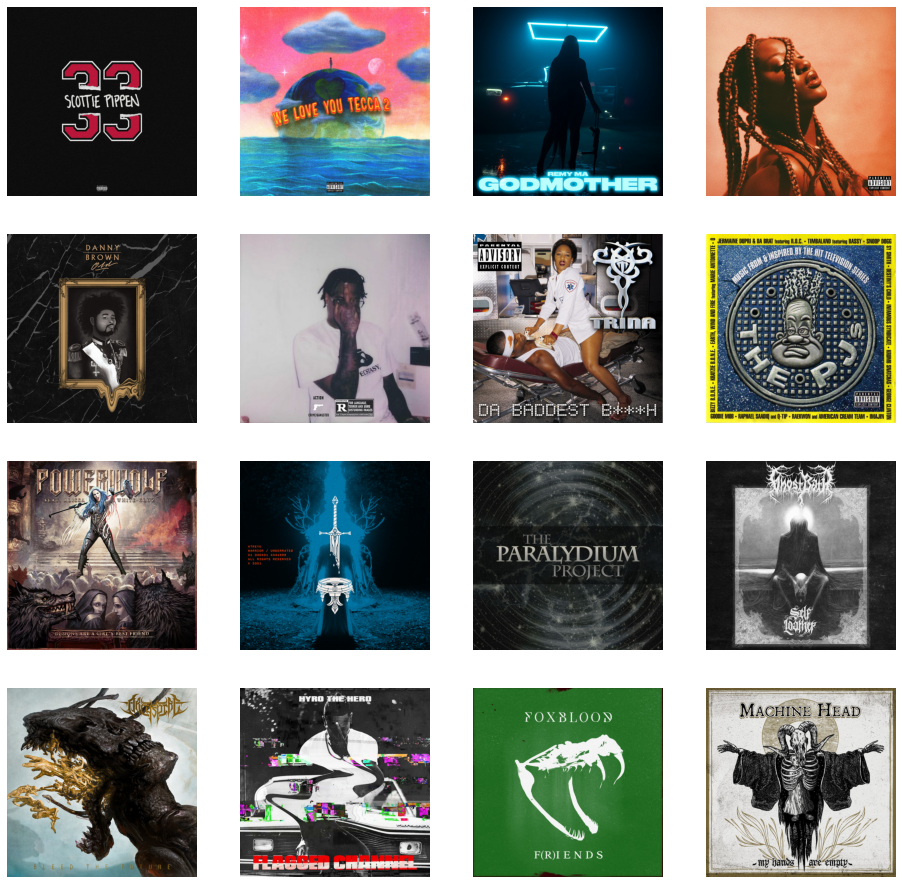

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics of spotify cover ar
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_hiphop_pix = [os.path.join(hiphop_train_dir, fname) 
                for fname in hiphop_train_names[pic_index-8:pic_index]]
next_metal_pix = [os.path.join(metal_train_dir, fname) 
                for fname in metal_train_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_hiphop_pix+next_metal_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#Building the model#

In [ ]:
pip install tensorflow==2.7.0

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.7.0


Baseline for the model is a CNN with batch normalization and relu activation. Last layer is an output layer with sigmoid activation loss for the prediction. 

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('hiphop') and 1 for the other ('metal')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [ ]:
#specification for model training, use binary crossentropy because its a binary task, RMSprop automates learning rate

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
#data preprocessing with IamgeDataGenerator with Picture size of 300x300px and Normalization

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/output/train',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/output/val',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 5032 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


# Training and testing #

Best performance with five Convolutional Layers and 20 epochs but only little progress. The results show an overall accuracy about 70 percentage in training, validation and testing. Theoretically the model should therefore classify nearly three out of four pictures as correct.

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=20,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/20
8/8 [==============================] - 98s 12s/step - loss: 0.8353 - accuracy: 0.5234 - val_loss: 0.6926 - val_accuracy: 0.5234
Epoch 2/20
8/8 [==============================] - 92s 11s/step - loss: 0.6922 - accuracy: 0.5254 - val_loss: 0.6911 - val_accuracy: 0.5469
Epoch 3/20
8/8 [==============================] - 87s 11s/step - loss: 0.6926 - accuracy: 0.5395 - val_loss: 0.6933 - val_accuracy: 0.5156
Epoch 4/20
8/8 [==============================] - 98s 12s/step - loss: 0.6854 - accuracy: 0.5449 - val_loss: 0.6760 - val_accuracy: 0.6094
Epoch 5/20
8/8 [==============================] - 93s 12s/step - loss: 0.8273 - accuracy: 0.5547 - val_loss: 0.6824 - val_accuracy: 0.6211
Epoch 6/20
8/8 [==============================] - 85s 10s/step - loss: 0.6836 - accuracy: 0.5876 - val_loss: 0.6746 - val_accuracy: 0.5781
Epoch 7/20
8/8 [==============================] - 92s 11s/step - loss: 0.6720 - accuracy: 0.5938 - val_loss: 0.7476 - val_accuracy: 0.5273
Epoch 8/20
8/8 [===========

 ## Evaluate the model ##

In [ ]:
# Evaluate on Validation data
evaluation_results = model.evaluate(validation_generator)
print("Loss: {}".format(evaluation_results[0]))
print("Accuracy: {}".format(evaluation_results[1]))

13/13 [==============================] - 12s 886ms/step - loss: 0.5566 - accuracy: 0.6900
Loss: 0.5565836429595947
Accuracy: 0.6899999976158142


## Visualization ###

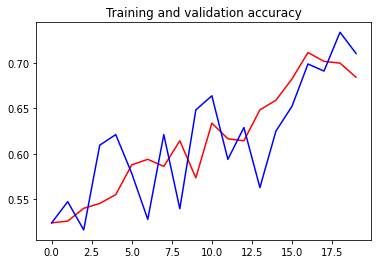

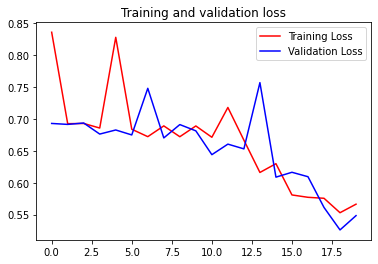

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.savefig("model4_acc")

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
plt.savefig("model4_loss")

##Testing the model with test_generator

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [ ]:
#Prepare the Data for testing
test_dir = '/your_folder'
test_datagen = ImageDataGenerator(
     rescale=1/255
 )

test_generator = test_datagen.flow_from_directory(
     test_dir,
     batch_size=64,
     class_mode='binary',
     target_size=(300, 300)
)


history = model.predict(test_generator)

Found 400 images belonging to 2 classes.


In [ ]:
#Test the model
model.evaluate(test_generator)

7/7 [==============================] - 12s 2s/step - loss: 0.5275 - accuracy: 0.7175


[0.5275097489356995, 0.7174999713897705]

# Save model #

In [ ]:
model.save('your_name_of_the_model.h5')

In [ ]:
model.save_weights('your_name_of_the_model_weights.h5')

 # Testing the model with files #

In [ ]:
#Prediction with files upload (works in other browsers than safari)

from google.colab import files
from keras.preprocessing import image
import PIL

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/your_test_folder' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a metal cover")
  else:
    print(fn + " is a hiphop cover")

Saving ab67616d0000b273329731739d6e673ba7b247da.jpeg to ab67616d0000b273329731739d6e673ba7b247da.jpeg
[0.]
ab67616d0000b273329731739d6e673ba7b247da.jpeg is a hiphop cover


# Visualizing Intermediate Representations #

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


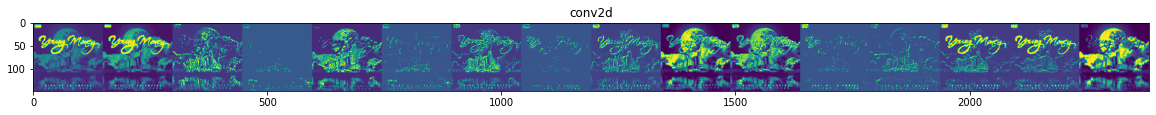

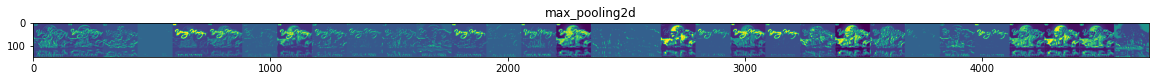

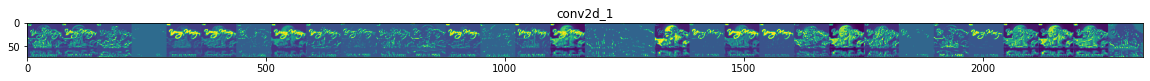

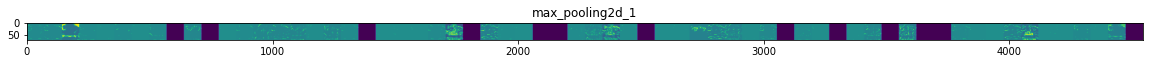

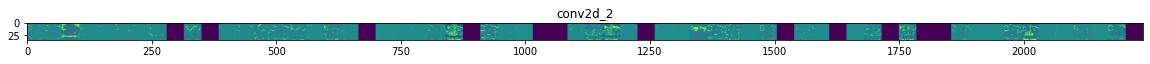

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
metal_train_files = [os.path.join(metal_train_dir, f) for f in metal_train_names]
hiphop_train_files = [os.path.join(hiphop_train_dir, f) for f in hiphop_train_names]
img_path = random.choice(metal_train_files + hiphop_train_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')